<a href="https://colab.research.google.com/github/Camouflage10/disease-spread-model/blob/Camouflage10-bagging/disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import seaborn as sn
import json

In [31]:
from matplotlib import text
x = pd.read_csv('train_x.csv')
y = pd.read_csv('dengue_labels_train.csv')
y=y.drop(columns=['city','year','weekofyear'])
test =pd.read_csv('test.csv')
print(len(x))
print(len(y))

1456
1456


In [32]:
test_removed=test[['city', 'year', 'week_start_date']]
test=test.drop(columns=['city', 'year', 'week_start_date'])

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

#X, y = x_train.iloc[:,:-1],y_train.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#bagging model

dt_model = DecisionTreeRegressor()
X, y = make_regression(n_samples=1000, n_informative=15, noise=0.1, random_state=1)
bagModel = BaggingRegressor(dt_model, n_estimators=22, max_features=1.0)
bagModel.fit(x_train, y_train)
preds = bagModel.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#scoring the model
score = bagModel.score(x_train, y_train)
print("Training Score: ", score)

#cross-val score
scores = cross_val_score(bagModel, x_train, y_train, cv=10)
print("Mean cross-val score: %.2f" % scores.mean())

#K-Fold cross-val
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(bagModel, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

#MSE and RMSE
preds = bagModel.predict(x_test)
preds = [round(value) for value in preds]
mse = mean_squared_error(y_test, preds)
print("MSE: %.2f" % mse)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#accuracy score round preds
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


RMSE: 17.434892
Training Score:  0.9652437605904012


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

Mean cross-val score: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

K-fold CV average score: 0.63
MSE: 303.92
RMSE: 17.433211
Accuracy: 6.24%


In [34]:
bagModel.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 22,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
#Fitting Bagging Classifier model with default hyper parameters
bagg = BaggingClassifier()
bagg.fit(x_train,y_train)
pred_bagg = bagg.predict(x_test)

#Checking different metrics for bagging model with default hyper parameters
print('Checking different metrics for bagging model with default hyper parameters:\n')
print("Training accuracy: ",bagg.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg)
print('Testing accuracy: ',acc_score)

#Setting values for the parameters
n_estimators = [100, 300, 500]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [ 50, 100, 150]
max_features = [1, 5, 8]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)
pred_bagg = bestbag.predict(x_test)
acc_score = accuracy_score(y_test, pred_bagg)
print('Testing accuracy: ',acc_score)
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking different metrics for bagging model with default hyper parameters:

Training accuracy:  0.9917948717948718
Testing accuracy:  0.10602910602910603
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing accuracy:  0.0893970893970894
The best hyper parameters are:
 {'max_features': 8, 'max_samples': 150, 'n_estimators': 100}


In [38]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=5, max_samples=25,n_estimators= 100)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#create metrics.json (optional metrics.txt also)
value = {
        "rmse": rmse
    }
with open('metrics.json', 'w') as outfile:
  outfile.write(json.dumps(value))

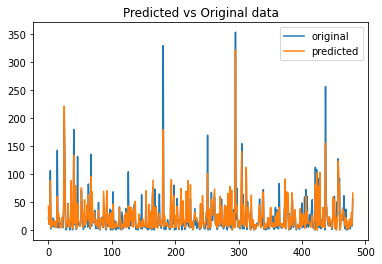

In [40]:
#visualization to see if it looks like it matches
x_ax = range(len(y_test))
plt.tight_layout()
fig1 = plt.gcf()
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, preds, label="predicted")
plt.title("Predicted vs Original data")
plt.legend()
plt.show()

#create a graph called stats.png
fig1.savefig('stats.png', dpi=100)

In [ ]:
#submit predictions fo test
def submit(model, test):
  pred=model.predict(x)